In [1]:
import sys
sys.path.insert(0, "/home/brandm/Documents/Tesis/conflictmodel/conflictmodel")

In [2]:
import csv
import random
import pickle

import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import numpy as np

import pandas as pd


In [3]:
import visualization as vzl

In [23]:
capital = {'Alice': 1000, 'Bob': 0, 'Charlie': 5000, 'Eve': 300}

# Step 1: Create a new dictionary with keys having values greater than 0
new_dict_1 = {k: v for k, v in capital.items() if v > 0}

# Step 2: Create a new dictionary using the keys from new_dict_1 and values from actors_pos
actors_pos = {'Alice': [10, 20], 'Bob': [5, 30], 'Charlie': [15, 25], 'David': [12, 18], 'Eve': [8, 22]}

new_dict_2 = {k: actors_pos[k] for k in new_dict_1}

print("New Dictionary 1 (keys with values greater than 0):")
print(new_dict_1)

print("\nNew Dictionary 2 (keys from new_dict_1 with values from actors_pos):")
print(new_dict_2)


New Dictionary 1 (keys with values greater than 0):
{'Alice': 1000, 'Charlie': 5000, 'Eve': 300}

New Dictionary 2 (keys from new_dict_1 with values from actors_pos):
{'Alice': [10, 20], 'Charlie': [15, 25], 'Eve': [8, 22]}


In [24]:
for key in actors_pos.keys():
    print(key)

Alice
Bob
Charlie
David
Eve


## Data Analysis

### Activity and total Resources

In [ ]:
pwd

In [4]:
df = pd.read_feather('/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/data.feather')

In [5]:
grid = np.load('/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/grid.npy')

In [6]:
matrix = np.load('/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/matrix.npy')

In [ ]:
df

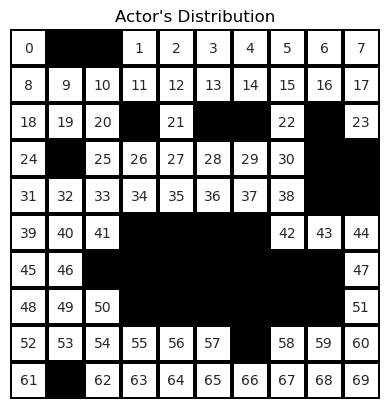

In [7]:
vzl.plot_grid(grid)

In [8]:
N = df.shape[1]-6
cycle = 3

In [ ]:
N

In [ ]:
x1 = np.arange(0,len(df[0]),1)

In [ ]:
total_resources = df.iloc[:, 8:].sum(axis = 1)


In [ ]:
# Calculate the range of years based on the length of x1
years = range(x1[0]//(N//3), (x1[-1]//(N//3)) + 1)

# Group the data by 33-year intervals and calculate the mean
df_grouped = df["Activity"].groupby((x1//(N//3))).mean()
df_grouped2 = total_resources.groupby((x1//(N//3))).mean()


In [9]:
filtered_df = df[df["Status"] == 1]

## Conflict Sizes

### Defence coalition ($\tau$)

In [10]:
size_t = filtered_df['Defenders'].tolist()

# Calculate the unique values and their respective frequencies
values_t, frequencies_t = np.unique(size_t, return_counts=True)
# Calculate the probability distribution

prob_distribution_t = frequencies_t / len(size_t)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


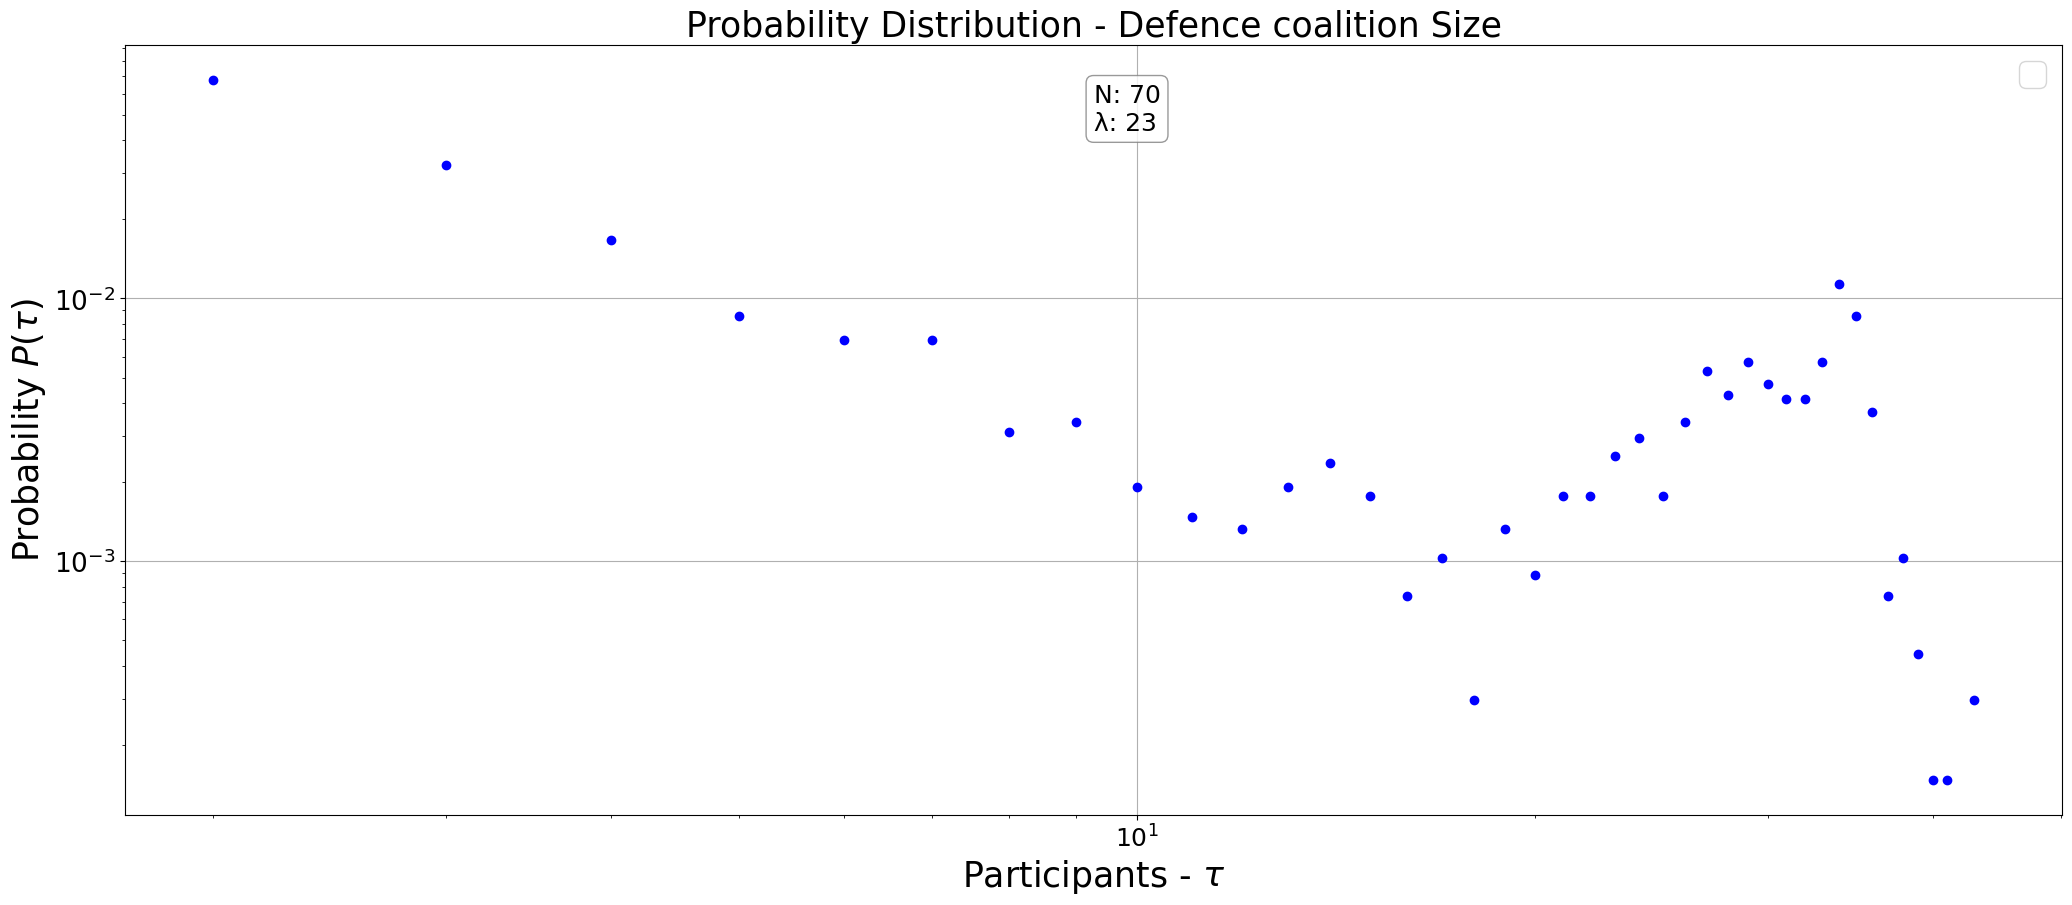

In [11]:
vzl.distibution_plot(values_t[1:],prob_distribution_t[1:], 'd', N, cycle, log_value = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


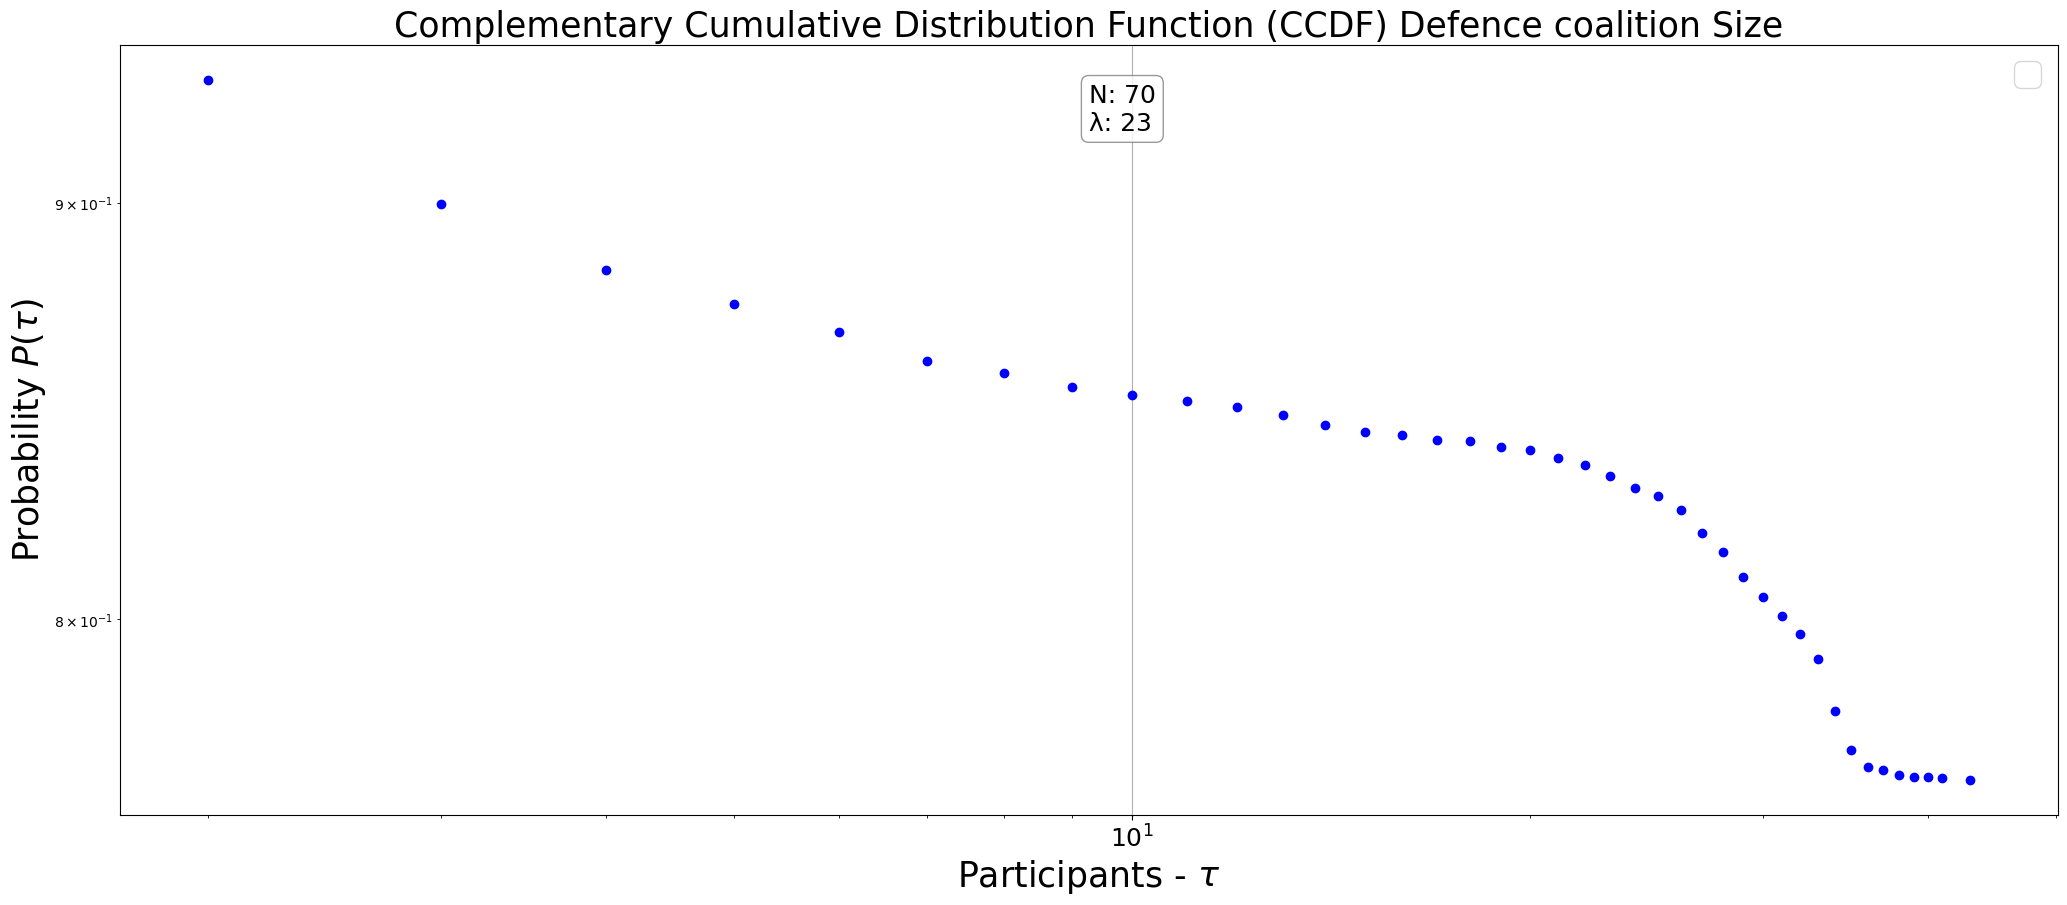

In [12]:
vzl.distibution_plot(values_t[1:],prob_distribution_t[1:], 'd', N, cycle, log_value = True, ccdf = True)

### Attack coalition ($\alpha$)

In [ ]:
size_a = filtered_df['Attackers'].tolist()

# Calculate the unique values and their respective frequencies
values_a, frequencies_a = np.unique(size_a, return_counts=True)
# Calculate the probability distribution

prob_distribution_a = frequencies_a / len(size_a)

In [ ]:
vzl.distibution_plot(values_a[1:],prob_distribution_a[1:], 'a', N, cycle, log_value = True)

In [ ]:
vzl.distibution_plot(values_a[1:],prob_distribution_a[1:], 'a', N, cycle, log_value = True, ccdf = True)

## Total

In [13]:
all_df = filtered_df['Total'].tolist()

# Calculate the unique values and their respective frequencies
values_all, frequencies_all = np.unique(all_df, return_counts=True)
# Calculate the probability distribution

prob_distribution_all = frequencies_all / len(all_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


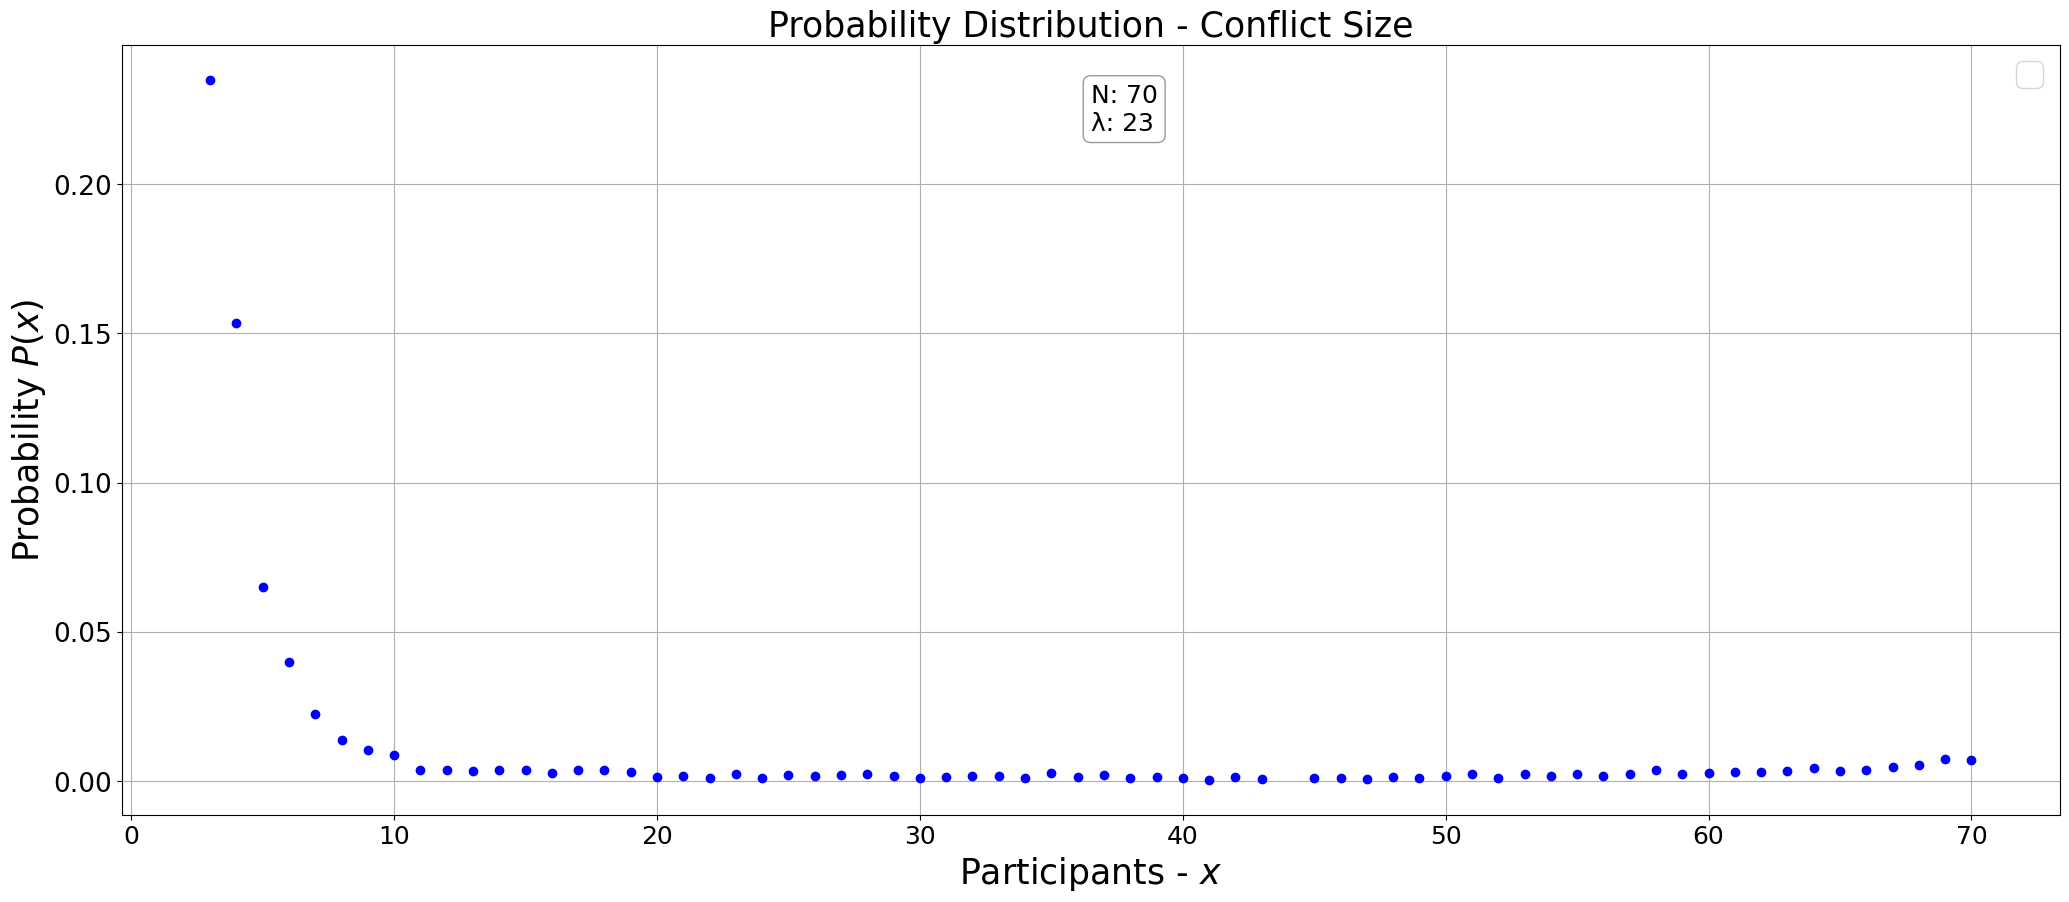

In [21]:
vzl.distibution_plot(values_all[1:],prob_distribution_all[1:], 't', N, cycle, log_value = False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


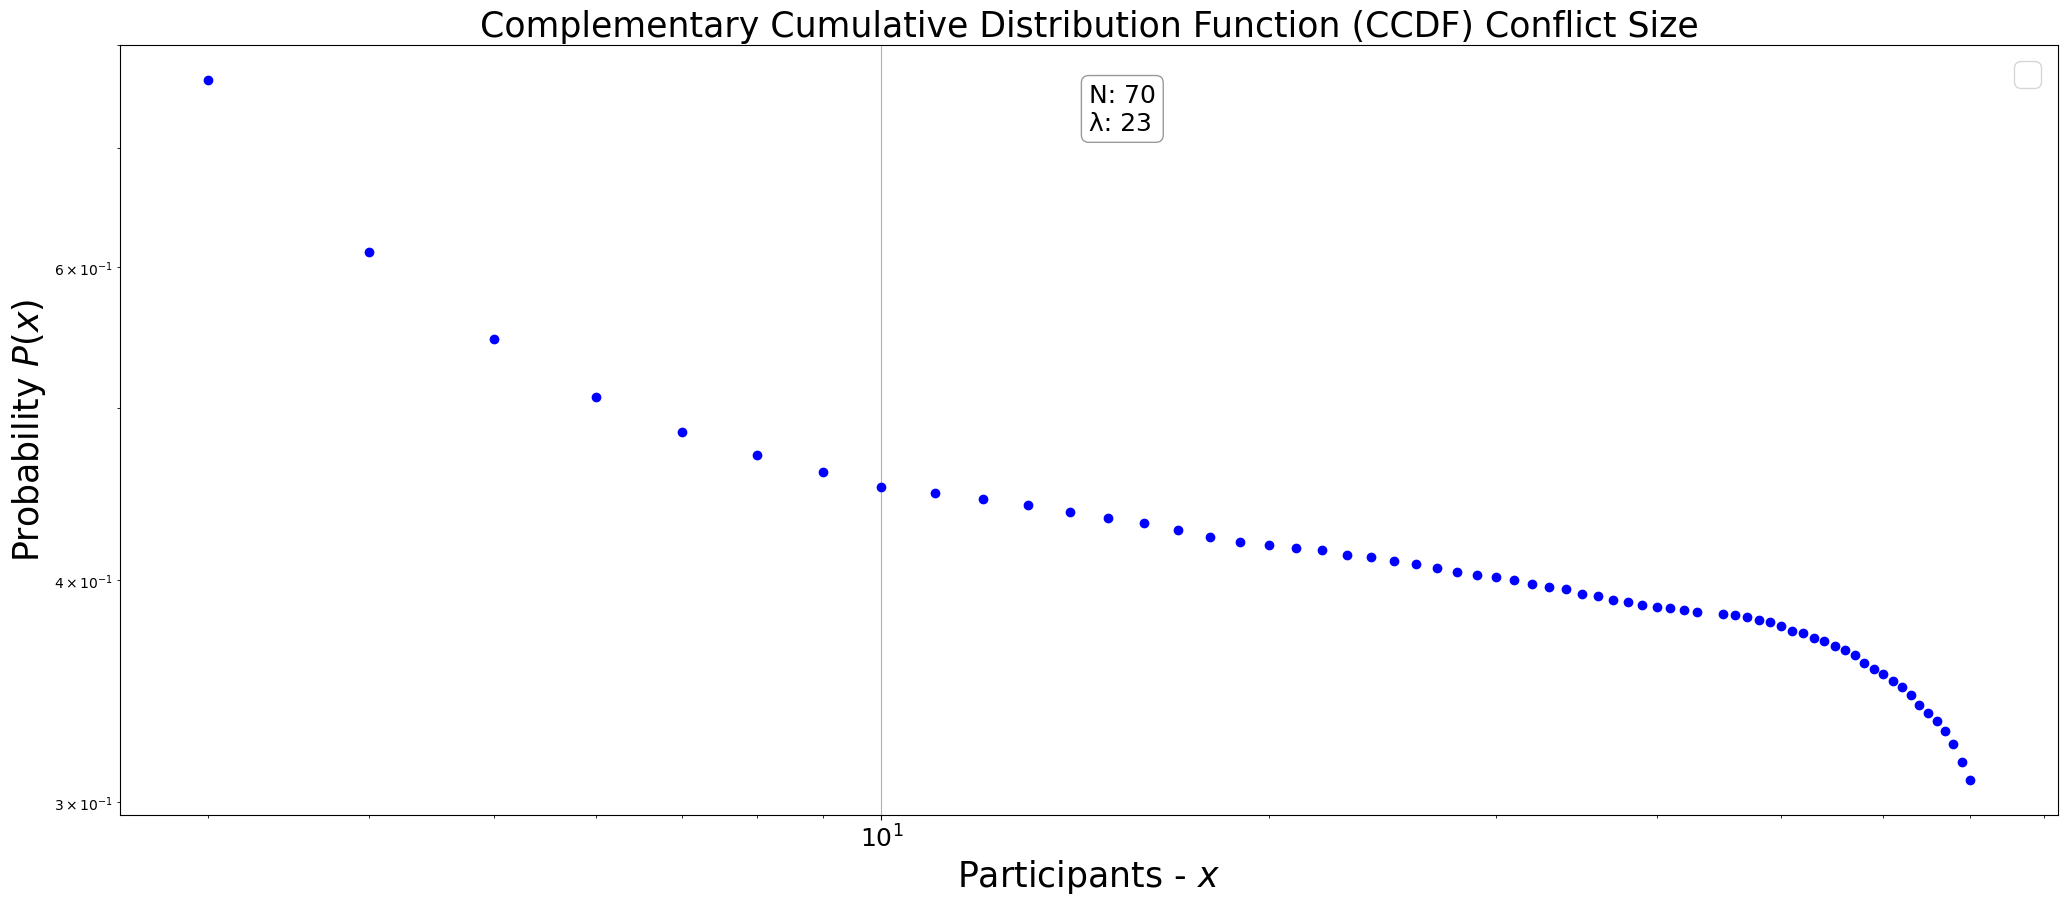

In [15]:
vzl.distibution_plot(values_all[1:],prob_distribution_all[1:], 't', N, cycle, log_value = True, ccdf = True)

# Periods of peace

In [ ]:
peace = df[df["Status"] != 1].groupby((df["Status"] == 1).cumsum()).size().tolist()

# Calculate the unique values and their respective frequencies
values_p, frequencies_p = np.unique(peace, return_counts=True)
# Calculate the probability frequencies
prob_frequencies_p = frequencies_p /len(peace)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


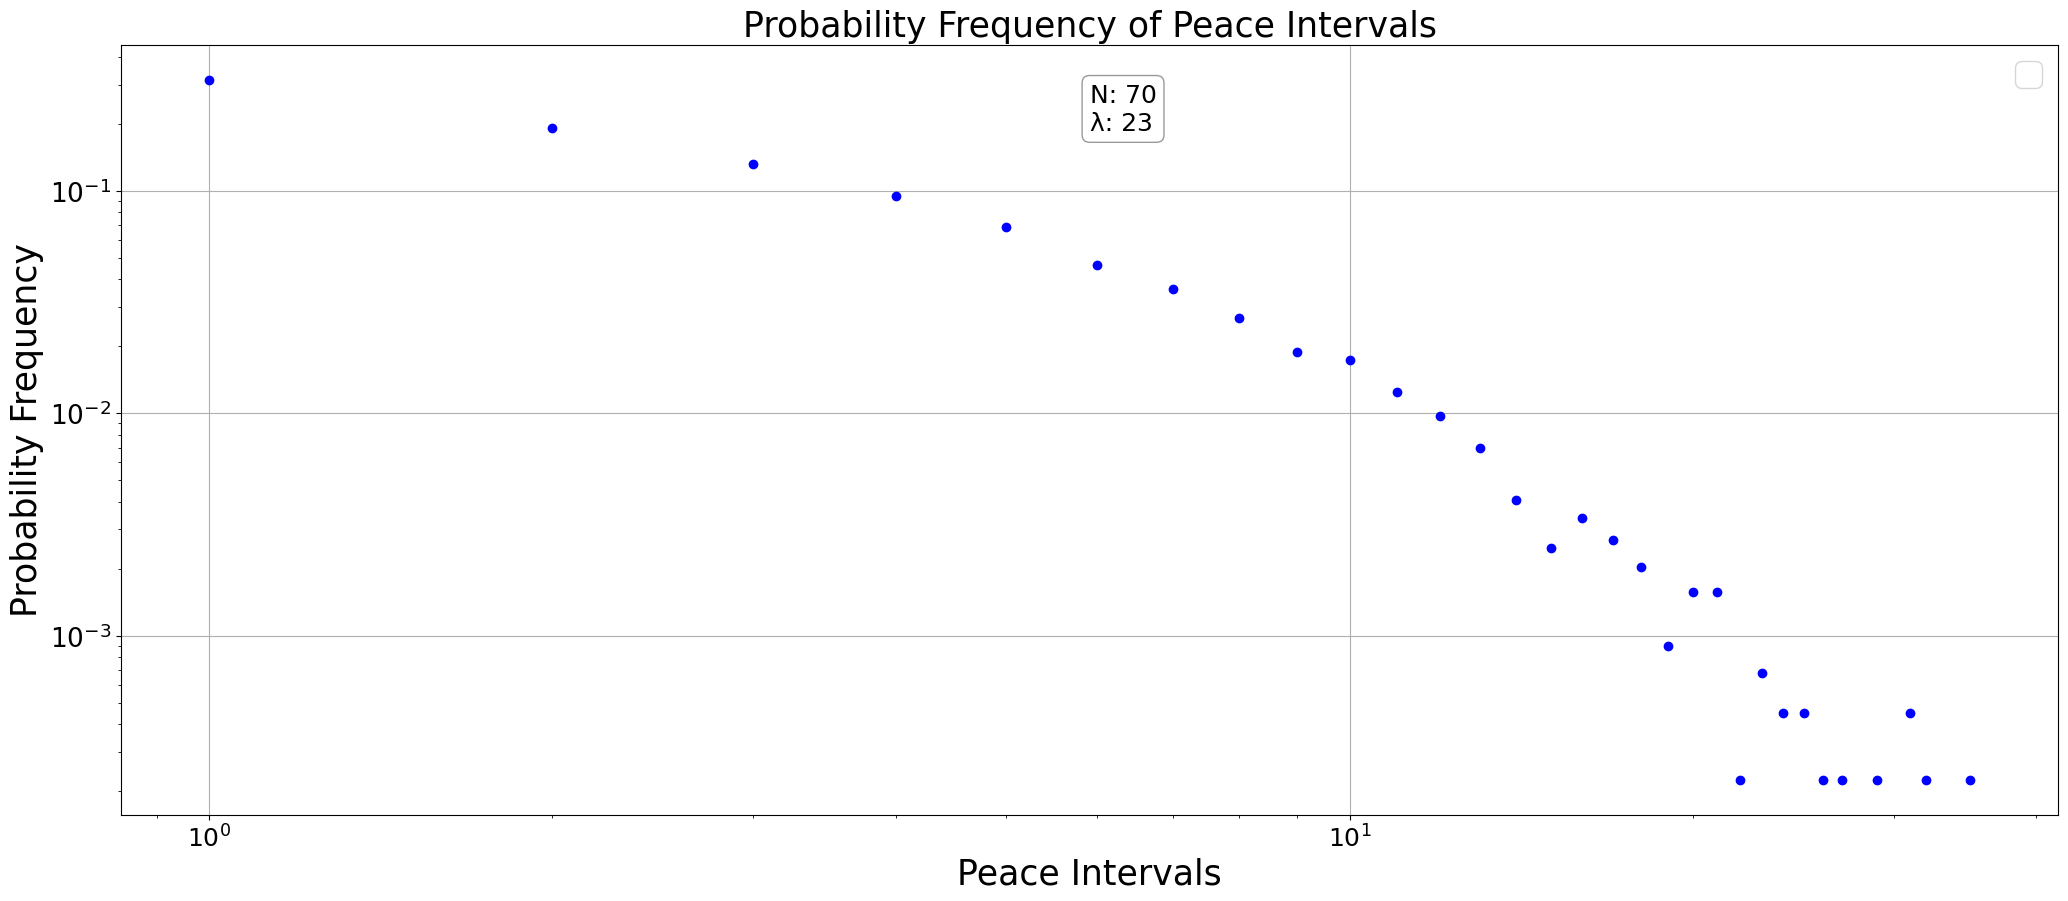

In [17]:
vzl.distibution_plot(values_p,prob_frequencies_p, 'p', N, cycle, log_value = True)

NameError: name 'sytle' is not defined

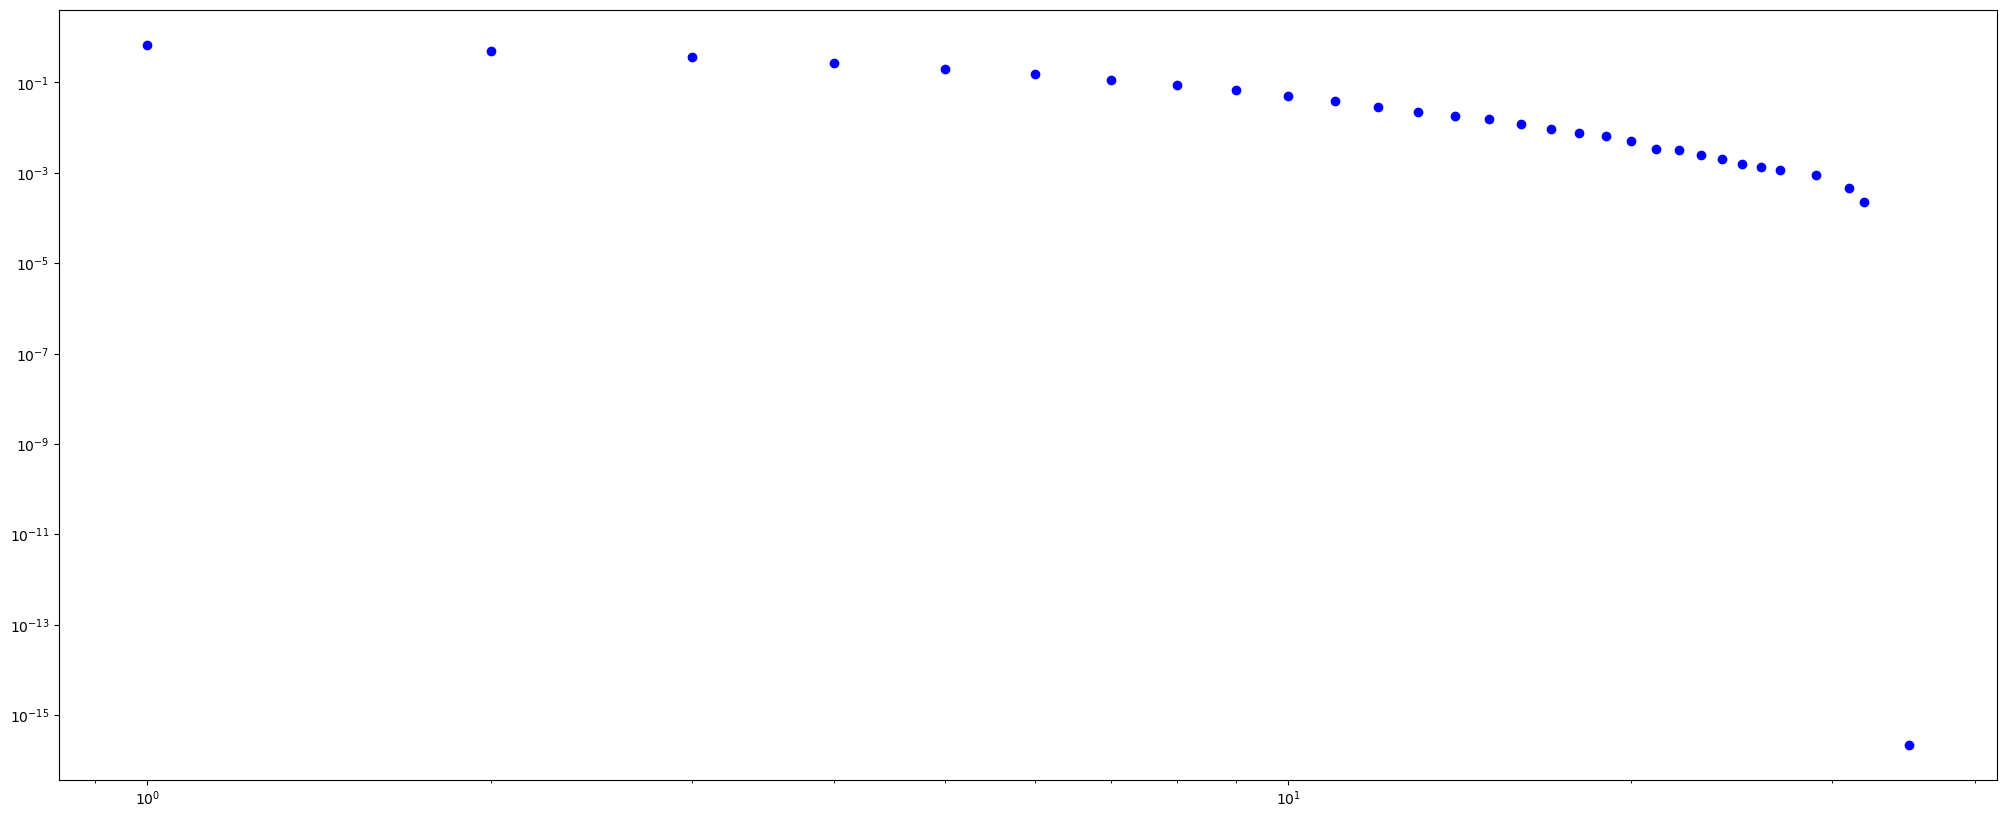

In [20]:
vzl.distibution_plot(values_p,prob_frequencies_p, 'p', N, cycle, log_value = True, ccdf = True)

# Activity

In [ ]:
# Calculate the unique values and their respective frequencies
unique_values, frequencies = np.unique(df_grouped.round(8), return_counts=True)


# Calculate the total number of data points
total_data_points = len(df_grouped)

# Calculate the probability frequencies
prob_frequencies = frequencies / total_data_points

# Total loss

In [ ]:
# Calculate the unique participants and their respective counts
participants, counts = np.unique(df_grouped2.round(3), return_counts=True)

# Sort the unique participants in ascending order
participants_sorted = np.sort(participants)

# Calculate the cumulative frequencies
cumulative_freq = np.cumsum(counts) / np.sum(counts)

# Calculate the log of participants and cumulative frequencies
log_participants = np.log10(participants_sorted)
log_cumulative_freq = np.log10(cumulative_freq)

los edges acorde a Axelrod  diferente grosor

exponente en funcion alpha en funcion en el numero de activaciones por año ver que es el alpha y ver en que influye en enumero de conflictos por año o por que no se conserva la ley de potencia.
densidad de obstaculos, densidad de obstaculos = .


incrementar el numero de vecinos paulatinamente. 
